# Compare ProgNa LES Sims
## Updated as of 5/24/24
* The below notebook allows one to compare large-eddy simulations.
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [42]:
%run functions_plotting.py

## select simulations to plot
sim_keyword = 'dx100_ProgNa.'  

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=0&format=xlsx',
                              sheet_name='Mean')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, height'])

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])
var_vec_2d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time, height'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, height'])

In [43]:
df_col_1d,df_col_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword,subfolder='sand') 

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
ssaf shows NAN values in ../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
iwp not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
od not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
odlc not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
ssaf not found in ../../output_les/DALES/sandbox/DALES_Lx25_dx100_ProgNa.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_ProgNa.nc
../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
na1 shows NAN values in ../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
na3 shows NAN values in ../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
niic shows NAN values in ../../output_les/icon/sandbox/ICON_Lx25_dx100_ProgNa.nc
eps shows NAN values in ..

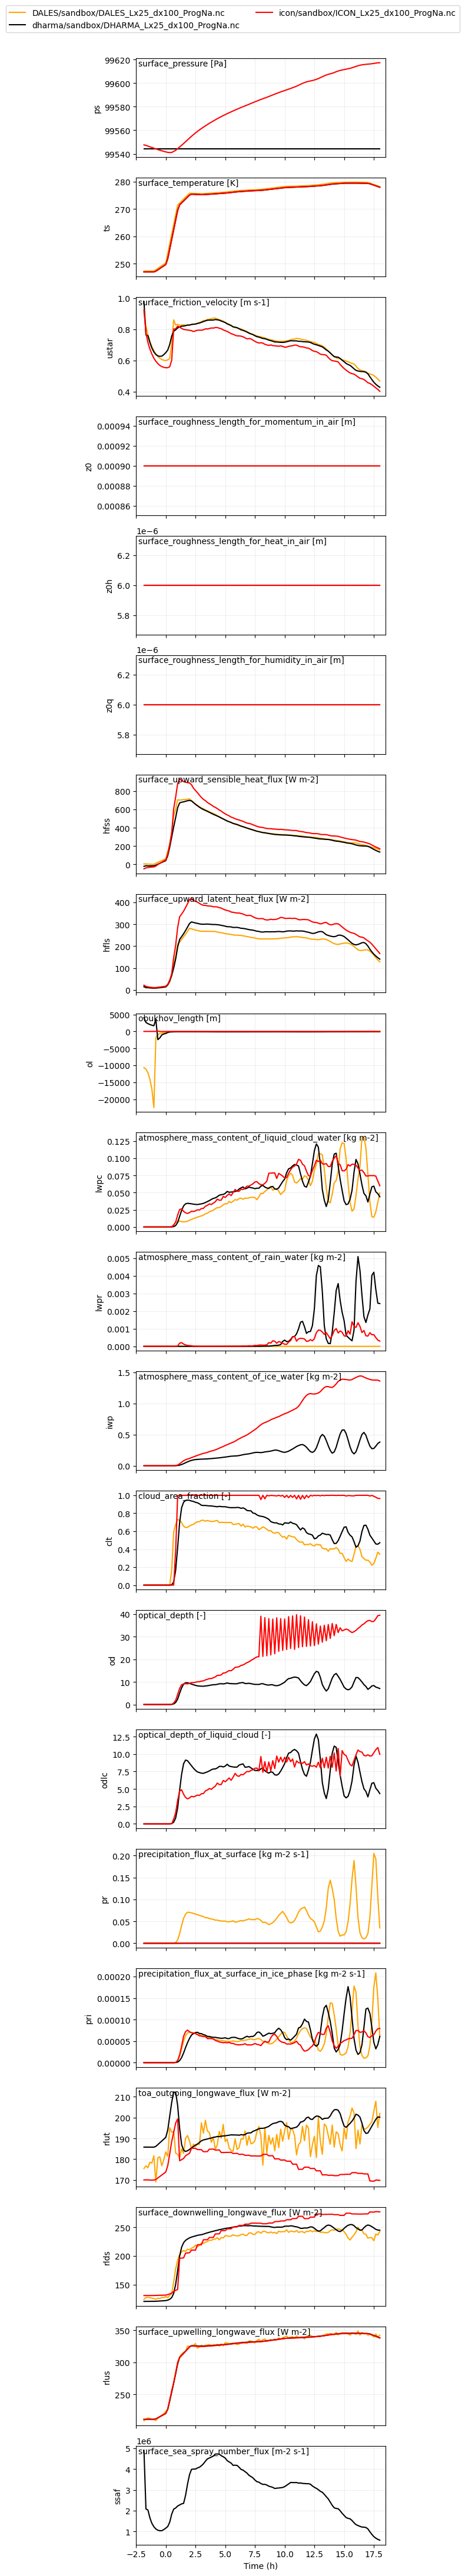

In [44]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_col_1d]),
                   var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units,
                   plot_colors=['orange','k','r','g','magenta','gold','lightskyblue'],plot_ls=['-','-','-','-','-','-','-'])

temporal averaging over 1.0 h interval


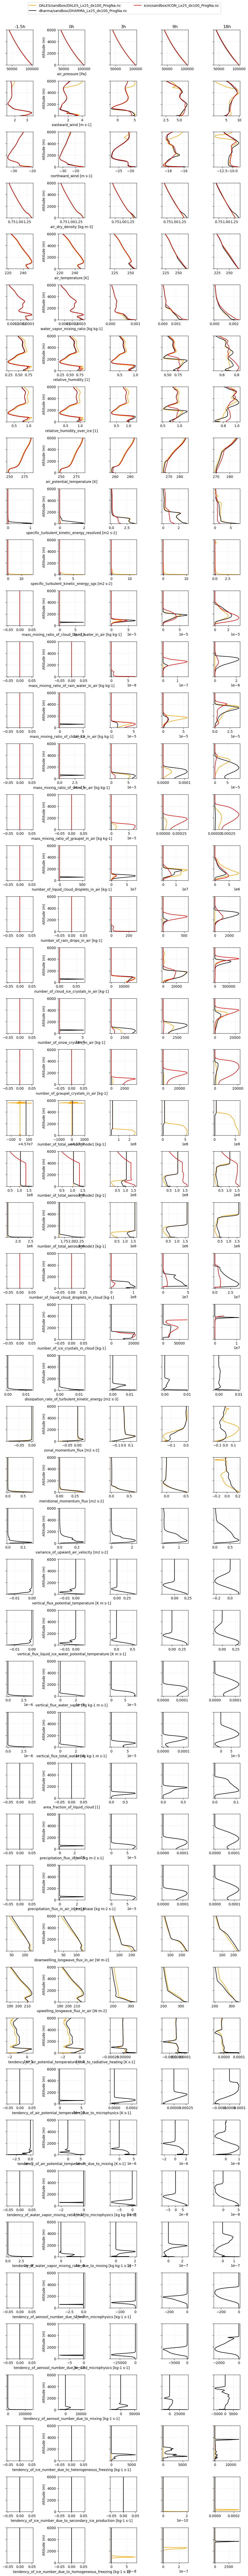

<Figure size 1000x600 with 0 Axes>

In [10]:
%run functions_plotting.py

## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_col_2d]),
                   var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units,longnames=var_vec_2d_long,
                   plot_colors=['orange','k','r','g','magenta','gold','lightskyblue'])